# Simulating Network Deliberation 

In [1]:
# Configure plotting in Jupyter
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator
import random
from numpy import random as nprand

In [2]:
# Import NetworkX
import networkx as nx
import numpy as np

In [3]:
import numpy as np

### Assign nodes to groups 

In [4]:
from learning import *

In [5]:
from topologies import *

## Clique

In [6]:
def clique_topology(learning_strategy, true_value):
    '''Simulates a learning strategy in a completely connected network 
    #Paramaters 
    G: it has to take a G parameter to try different networks (SW, karate, etc...)
    learning strategy: the algortihm use to update participants beliefs over time 
    true value: the ground truth each participant is trying to reach
    
    #Return 
    the beliefs at all stages 
    '''

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    steps = 5 #number of steps in each learning stratey
    G = nx.complete_graph(N)
    #nx.draw(G)

    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)

    for stage in range(stages): 
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, learning_strategy, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, learning_strategy, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)
    return beliefs_stages
    #print("beliefs of all stages", beliefs_stages)


In [7]:
#G = nx.watts_strogatz_graph(100, 4, 0)
#true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1] #ground truth 
#clique_topology(G, learning_step_best_neighbor, true_value)

## Long path topology

In [8]:
def long_path_topology(learning_strategy, true_value):
    '''Simulates a learning strategy in a long path network 
    #Paramaters 
    learning strategy: the algortihm use to update participants beliefs over time 
    true value: the ground truth each participant is trying to reach
    
    #Return 
    the beliefs at all stages 
    
    '''

    ##Uses a long path topology

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    true_value = [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1] #ground truth #true_value = [1,0,1,0]
    steps = 5 #number of steps in each learning stratey



    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)


    for stage in range(stages):
        groups = get_long_path_stage_groups(N, M, stage)
        #print("all the groups", groups)
        G = nx.Graph()
        for group in groups:
            #print("group in groups", group) #nodes to form clique network
            g = nx.complete_graph(group) #clique network
            #print("clique network", g.nodes())
            #nx.draw(g)
            G = nx.union(G,g)
        #print("All the edges in graph G are", G.nodes())
        #nx.draw(G)
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, most_popular_list, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)

    return beliefs_stages

## Random Topology

In [9]:
def random_topology(learning_strategy, true_value):
    '''Simulates a learning strategy in a random network 
    #Paramaters 
    learning strategy: the algortihm use to update participants beliefs over time 
    true value: the groun truth each participant is trying to reach
    
    #Return 
    the beliefs at all stages 
    '''

    N = 100 #num of participants(nodes)
    M = 5 #group size
    stages = 5  #stages
    steps = 5 #number of steps in each learning stratey


    beliefs_stages = []
    #print("To keep beliefs after stages", beliefs_stages)

    for stage in range(stages):
        groups = get_random_stage_groups(N, M, stage)
        #print("all the groups", groups)
        G = nx.Graph()
        for group in groups:
            #print("group in groups", group) #nodes to form clique network
            g = nx.complete_graph(group) #clique network
            #print("clique network", g.nodes())
            #nx.draw(g)
            #adds cliques to a network 
            G = nx.union(G,g)
        #print("All the edges in graph G are", G.nodes())
        #nx.draw(G)
        if stage == 0: 
            ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
            beliefs_stages = [ini_beliefs]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", ini_beliefs)
            beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at stage", stage, "after learn() are", beliefs_stages)

        else:
            sub_ini_beliefs = beliefs_stages[-1]
            #print("Stage #", stage)
            #print("The initial beliefs at stage", stage, "are", sub_ini_beliefs)
            beliefs_list = learn(G, sub_ini_beliefs, learning_step_best_neighbor, true_value, steps)
            beliefs_stages += beliefs_list
            #print("Beliefs at", stage, "after learn() are", beliefs_stages)

    #print("beliefs of all stages", beliefs_stages)
    return beliefs_stages

In [10]:
def run_trial(G, learning_strategy, true_value):
    """
    Plots the fraction of correct nodes in all stages of a simulation
    
    #Parameters:
    G: topology
    learning strategy: learning strategy to simulate in topology
    plot: plotting function used to plot beliefs  (fixed for now)
    true_value = the ground truth 
    stages: for now is fixed, eventually will change. (fixed for now) 
    
    return
    plots the beliefs all stages
    """
    beliefs_stages = G(learning_strategy, true_value)
    plot_beliefs_correct(beliefs_stages, true_value)

No handles with labels found to put in legend.


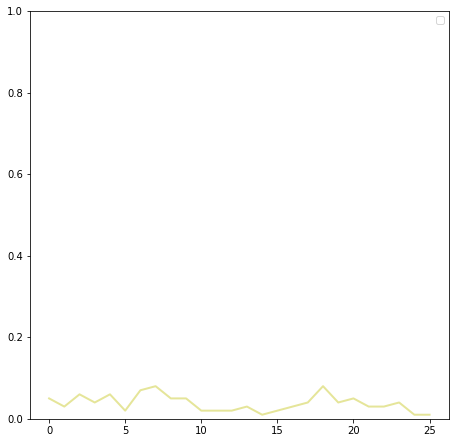

In [11]:
G = clique_topology
learning_strategy = random_neighbor_bit
true_value = [1, 1, 1, 0, 1, 0]


run_trial(G, learning_strategy, true_value)

# Plotting

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .20)


beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 4, 1)
plt.title("Karate club")
true_value = [1, 0, 1, 0, 1]
ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .20)

beliefs_list =  learn(G, ini_beliefs, rand_neighbor_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 2)
beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 3)
beliefs_list =  learn(G, ini_beliefs, most_popular_list, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)

plt.subplot(1, 4, 4)
beliefs_list =  learn(G, ini_beliefs, learning_step_best_neighbor, true_value, steps = 100)
plot_beliefs_correct(beliefs_list, true_value)


#plot_belief_bits_correct(beliefs_list, true_value = [1, 0, 1, 0, 1])
plt.tight_layout()

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
beliefs_list =  learn(G, ini_beliefs, learning_step_bit_majority, true_value, steps = 10)
plot_beliefs_correct(beliefs_list, true_value)
plt.tight_layout()

In [ ]:
G = nx.karate_club_graph()
plt.subplot(1, 1, 1)
plt.title("Karate club")
true_value=[1, 0, 1, 0, 1]

ini_beliefs = initial_beliefs_noisy(G, true_value, p_error= .40)
beliefs_list =  learn(G, ini_beliefs, random_neighbor_bit, true_value, steps = 10)
plot_beliefs_correct(beliefs_list, true_value)
plt.tight_layout()

## old code 